In [12]:
from Logger import Logger

logger = Logger()

logger.start_session(subject="IB", session="Afternoon")


The available subjects are: ['MFI', 'Valuation', 'IB']


The available sessions are: ['Morning', 'Afternoon', 'Evening']


Study session started at 18:38:14


Studying for: 00:54:56	Time spent studying today: 04:54:11

In [4]:
while True:
    continue

Studying for: 01:19:59	Time spent studying today: 01:19:59

KeyboardInterrupt: 

In [15]:
#logger.abort_session() 

Study session of 17:38:19 aborted


In [13]:
logger.end_session()

Study session ended at 19:33:11
{'day': datetime.date(2025, 1, 21), 'start_time': datetime.datetime(2025, 1, 21, 18, 38, 14, 514069), 'end_time': datetime.datetime(2025, 1, 21, 19, 33, 11, 446012), 'total_time': datetime.timedelta(seconds=3296, microseconds=931943), 'session': 'Afternoon', 'subject': 'IB'}
File saved at: ./Logs/study_sessions.csv


In [32]:
df_today = logger._today_stats()[0]

time_today = df_today["total_time"].sum()
time_today

Timedelta('0 days 09:28:08.644575')

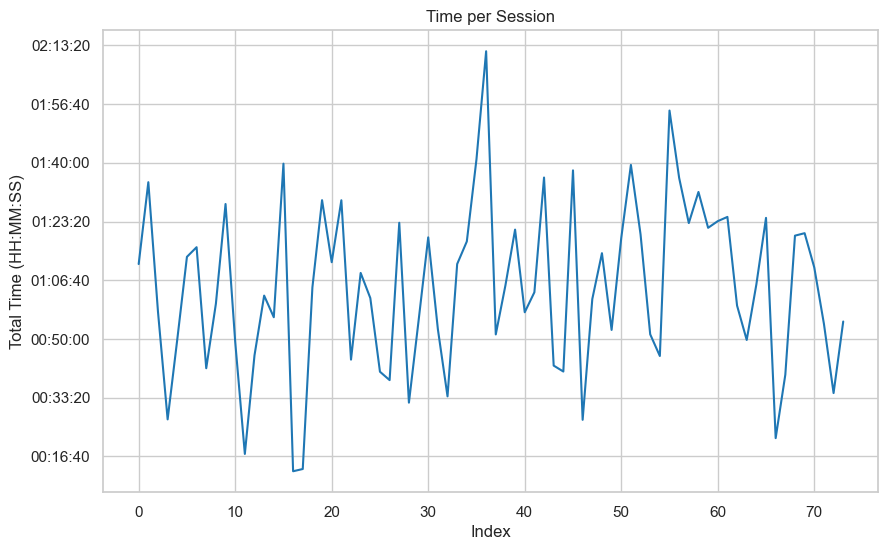

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

sns.set_context("notebook")  # You can choose 'paper', 'notebook', 'talk', or 'poster'
sns.set_style("whitegrid")

df_ex = logger._open_log()


# Assuming df_ex is your DataFrame
df_ex['total_time_seconds'] = df_ex['total_time'].dt.total_seconds()

# Function to convert seconds to HH:MM:SS format
def seconds_to_hms(x, pos):
    hours, remainder = divmod(int(x), 3600)
    minutes, seconds = divmod(remainder, 60)
    return f'{hours:02}:{minutes:02}:{seconds:02}'

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ex, x=df_ex.index, y="total_time_seconds")

# Format the y-axis to show time in HH:MM:SS
formatter = FuncFormatter(seconds_to_hms)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Index')
plt.ylabel('Total Time (HH:MM:SS)')
plt.title('Time per Session')
plt.show()

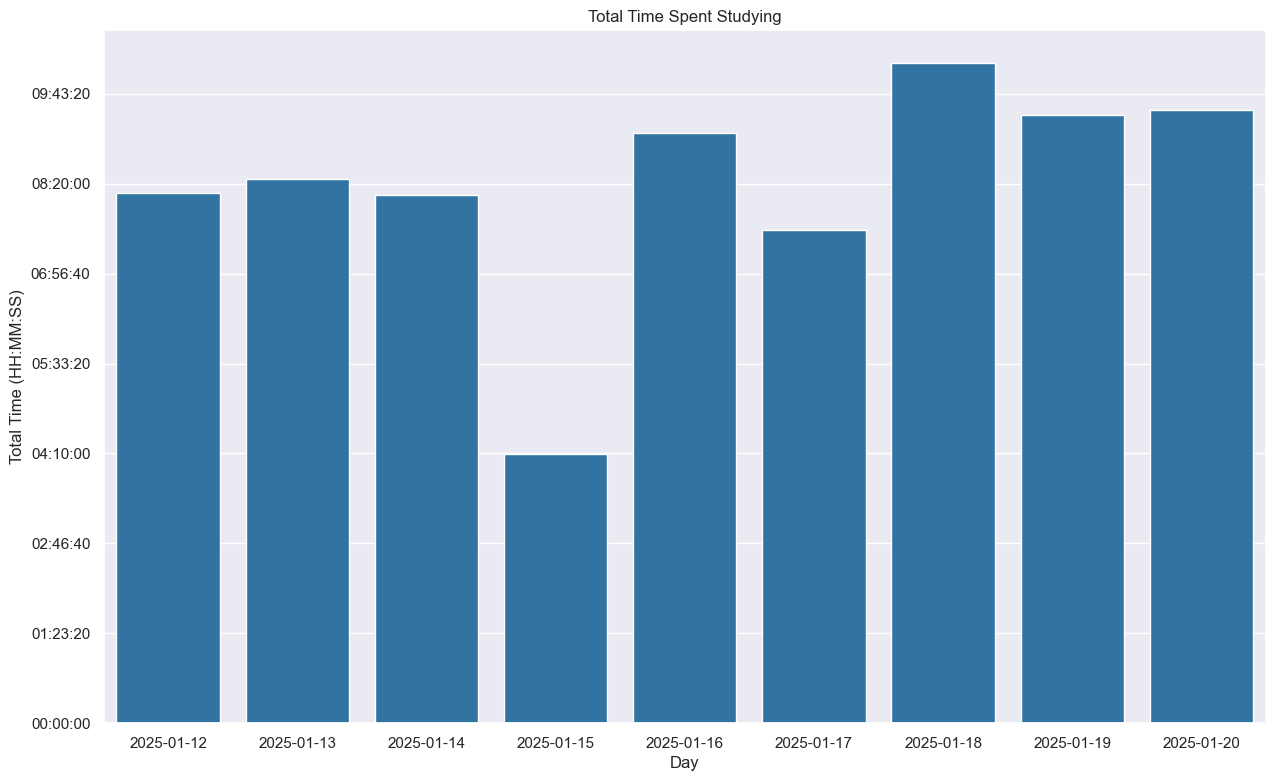

In [38]:
sns.set_context("notebook")  # You can choose 'paper', 'notebook', 'talk', or 'poster'
sns.set_style("darkgrid")


df_grouped = df_ex.groupby(["day"]).agg({"total_time": "sum"})

df_grouped['total_time_seconds'] = df_grouped['total_time'].dt.total_seconds()

# Function to convert seconds to HH:MM:SS format
def seconds_to_hms(x, pos):
    hours, remainder = divmod(int(x), 3600)
    minutes, seconds = divmod(remainder, 60)
    return f'{hours:02}:{minutes:02}:{seconds:02}'

# Create the plot
plt.figure(figsize=(15, 9))
sns.barplot(data=df_grouped, x=df_grouped.index, y="total_time_seconds")

# Format the y-axis to show time in HH:MM:SS
formatter = FuncFormatter(seconds_to_hms)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Day')
plt.ylabel('Total Time (HH:MM:SS)')
plt.title('Total Time Spent Studying')
plt.show()